### **KLASIFIKASI SAYURAN**
#### Hadi Bayu Saputra - 2009106006
#### Muhammad Fathir Fahreza - 2009106024
#### Muhammad Amri Rasyid Ramadhan - 2009106047

#### **Import Library**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
import pathlib
import seaborn as sns
from tensorflow.keras.utils import plot_model

#### **Data Collecting**

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = (120,120)
BASE_PATH = 'Vegetable Images/'

train_path = 'Vegetable Images/train/'
test_path = 'Vegetable Images/test/'
val_path = 'Vegetable Images/validation/'

In [3]:
#Training
train = tf.keras.utils.image_dataset_from_directory(train_path,
                                                    batch_size = BATCH_SIZE,
                                                    label_mode='categorical',
                                                    shuffle = True)

#Validation
test = tf.keras.utils.image_dataset_from_directory(test_path,
                                                    batch_size = BATCH_SIZE,
                                                    label_mode='categorical',
                                                    shuffle = True)

#Test
val = tf.keras.utils.image_dataset_from_directory(val_path,
                                                    batch_size = BATCH_SIZE,
                                                    label_mode='categorical',
                                                    shuffle = True)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


#### **Data Visualization**

**Meta Data**

In [4]:
image, label = next(iter(train))

def getsize():
    image_count = 0
    for i in os.listdir(BASE_PATH):
        data_dir = pathlib.Path("Vegetable Images/" + i)
        image_count += len(list(data_dir.glob('*/*.jpg')))
    return image_count

def getTrainsize():
    image_count = 0
    
    data_dir = pathlib.Path(train_path)
    image_count += len(list(data_dir.glob('*/*.jpg')))
    return image_count

def getValsize():
    image_count = 0
    
    data_dir = pathlib.Path(val_path)
    image_count += len(list(data_dir.glob('*/*.jpg')))
    return image_count

def getTestsize():
    image_count = 0
    
    data_dir = pathlib.Path(test_path)
    image_count += len(list(data_dir.glob('*/*.jpg')))
    return image_count


In [5]:
print("Datasets      :  Vegetable Image")
print("Image Feature : ", image.shape)
print("Label Feature : ", train.class_names)
print("Image Count   : ", getsize())
print("Train Size    : ", getTrainsize())
print("Val Size      : ", getValsize())
print("Test Size     : ", getTestsize())

Datasets      :  Vegetable Image
Image Feature :  (32, 256, 256, 3)
Label Feature :  ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
Image Count   :  21000
Train Size    :  15000
Val Size      :  3000
Test Size     :  3000


**Preview Image**

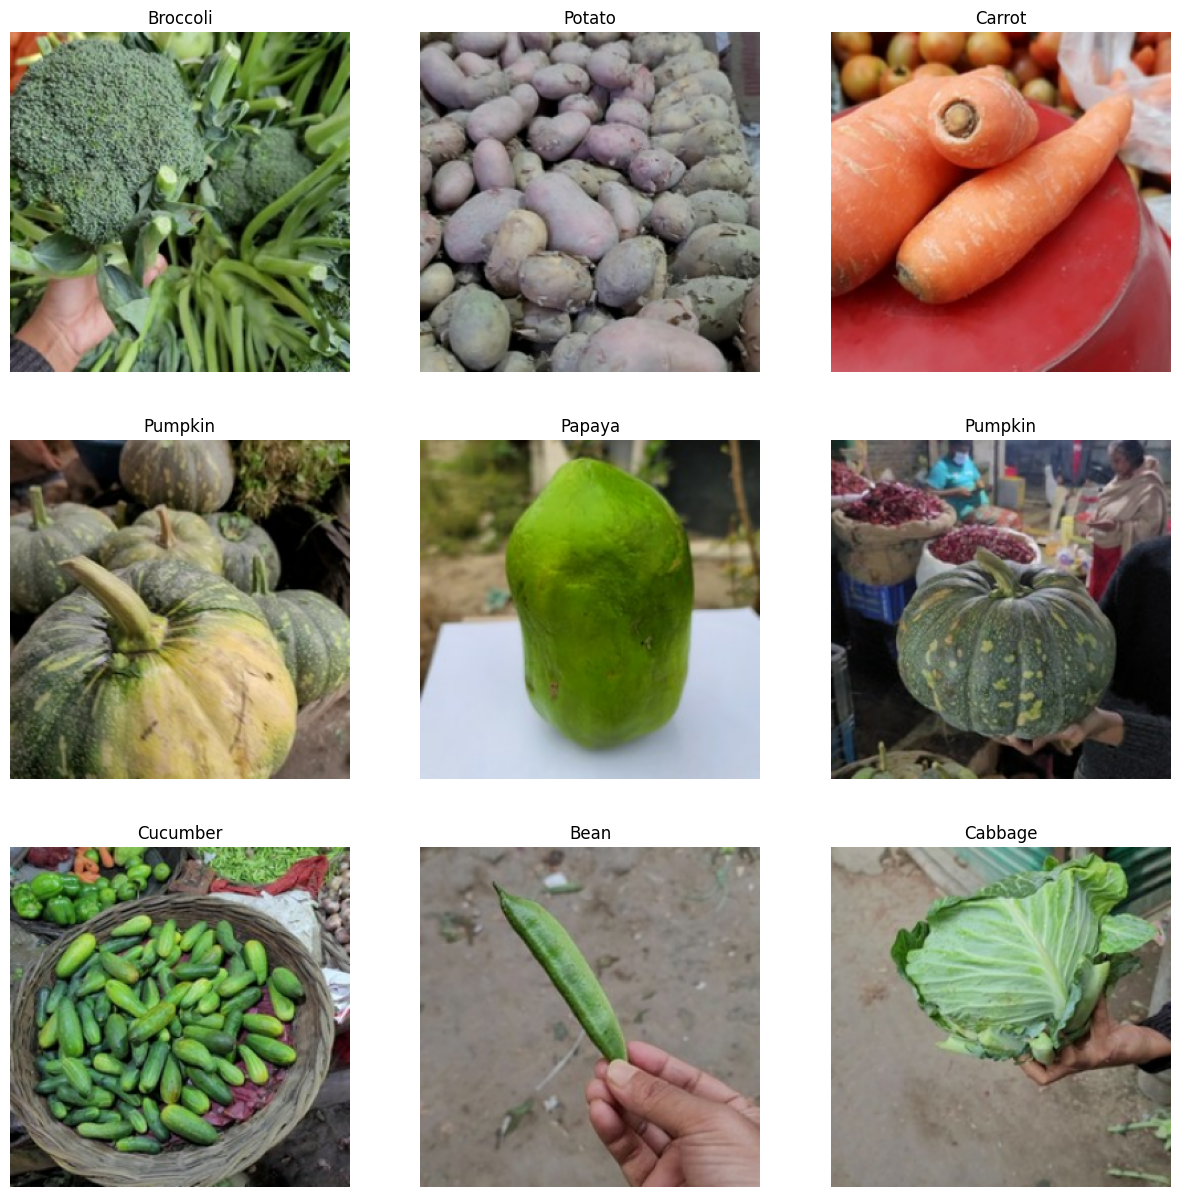

In [6]:
class_names = train.class_names


plt.figure(figsize=(15, 15))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")

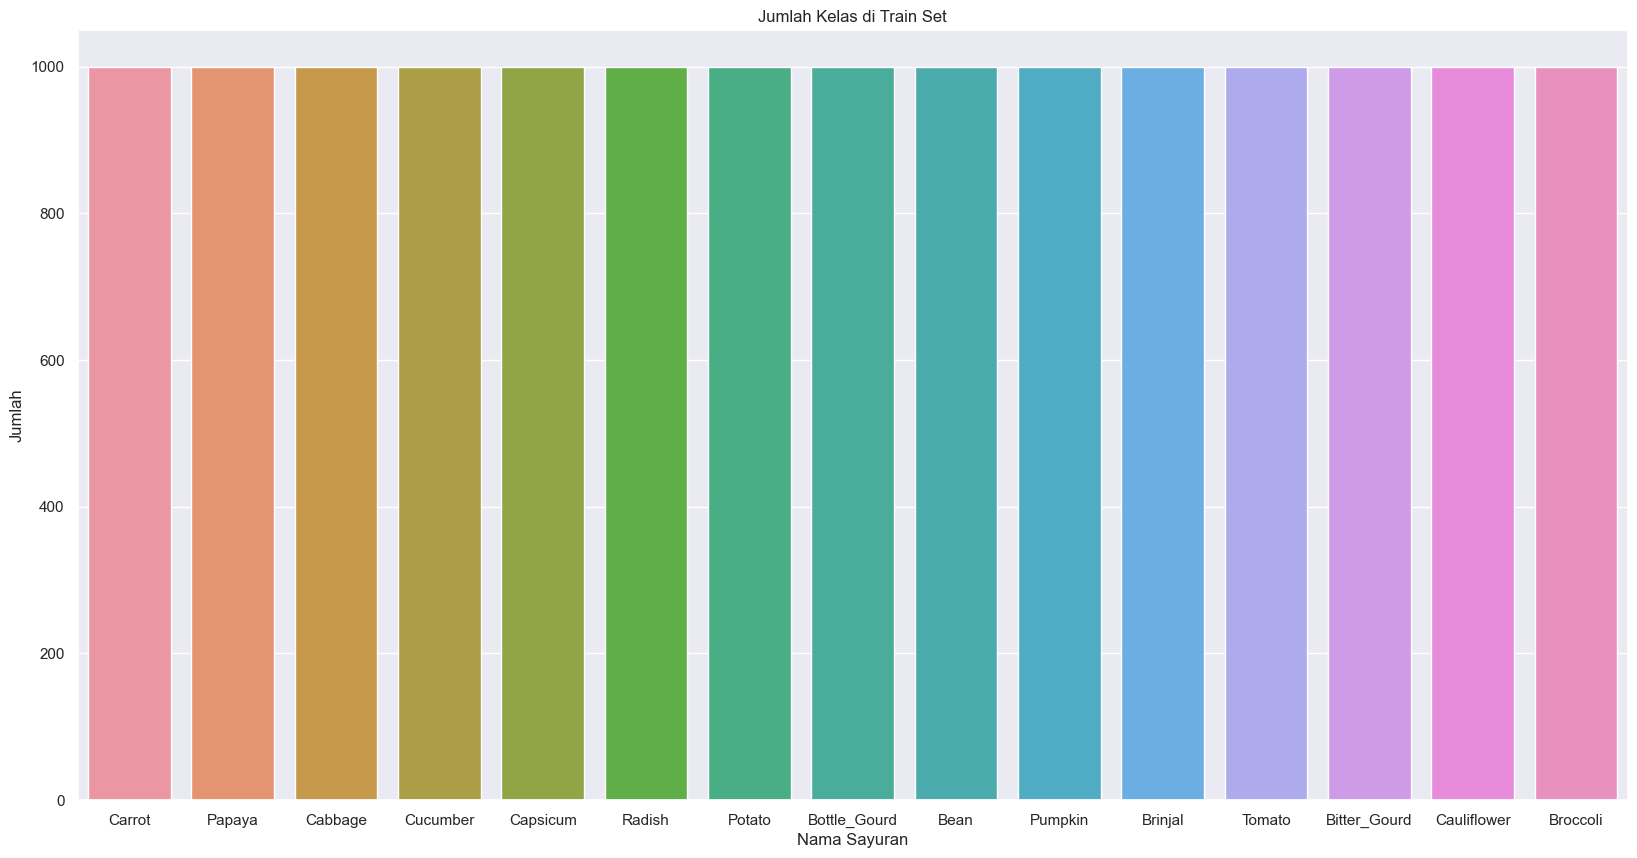

In [7]:
trainTemp = train.unbatch()
labels = []
for x, y in trainTemp:
    index = tf.argmax(y)
    labels.append(class_names[index])

plt.figure(figsize=(20, 10))

sns.set_theme()

sns.countplot(x=labels)
plt.xlabel('Nama Sayuran')
plt.ylabel('Jumlah')
plt.title('Jumlah Kelas di Train Set')
plt.show()

#### **Preprocessing Image**

In [8]:
#Normalisasi
def normalize_img(image, label):
  return tf.cast(image, tf.float32)/255 , label

#Grayscale
def rgb2gray(image, label):
  return tf.image.rgb_to_grayscale(image), label

#Tambah tingkat keterangan
def random_brightness(image, label):
  return tf.image.random_brightness(image,max_delta=0.5), label

def resize(image, label):
    return tf.image.resize(image,[120,120]),label

def augment_using_ops(images, labels):
	images = tf.image.random_flip_left_right(images)
	images = tf.image.random_flip_up_down(images)
	images = tf.image.random_rot90(images)
	return images, labels

In [12]:
train = train.map(rgb2gray).map(normalize_img).map(random_brightness).map(resize)
test = test.map(rgb2gray).map(normalize_img).map(resize)
val = val.map(rgb2gray).map(normalize_img).map(resize)

#### **Modelling**

In [ ]:
model = tf.keras.Sequential([

tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=[120, 120, 1]), #input

tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.6),
tf.keras.layers.Flatten(),

tf.keras.layers.Dense(15, activation='softmax') #output
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 118, 118, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 57, 57, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 16)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)            

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hasil = model.fit(train, epochs=30,batch_size=32,validation_data=val,verbose=1)

Epoch 1/30
469/469 [==============================] - 83s 175ms/step - loss: 2.2271 - accuracy: 0.2878 - val_loss: 1.8593 - val_accuracy: 0.4413
Epoch 2/30
469/469 [==============================] - 84s 178ms/step - loss: 1.5791 - accuracy: 0.5050 - val_loss: 1.3468 - val_accuracy: 0.5757
Epoch 3/30
469/469 [==============================] - 82s 175ms/step - loss: 1.2732 - accuracy: 0.6029 - val_loss: 1.1800 - val_accuracy: 0.6310
Epoch 4/30
469/469 [==============================] - 83s 176ms/step - loss: 1.1129 - accuracy: 0.6512 - val_loss: 1.0847 - val_accuracy: 0.6630
Epoch 5/30
469/469 [==============================] - 83s 176ms/step - loss: 0.9670 - accuracy: 0.6959 - val_loss: 0.9788 - val_accuracy: 0.6963
Epoch 6/30
469/469 [==============================] - 84s 177ms/step - loss: 0.8999 - accuracy: 0.7141 - val_loss: 0.9669 - val_accuracy: 0.7047
Epoch 7/30
469/469 [==============================] - 84s 177ms/step - loss: 0.8024 - accuracy: 0.7429 - val_loss: 0.8779 - val_ac

#### **Evaluate**

In [ ]:
test_evaluate = model.evaluate(test,verbose =0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

Test loss     : 0.7370580434799194
Test accuracy : 0.8


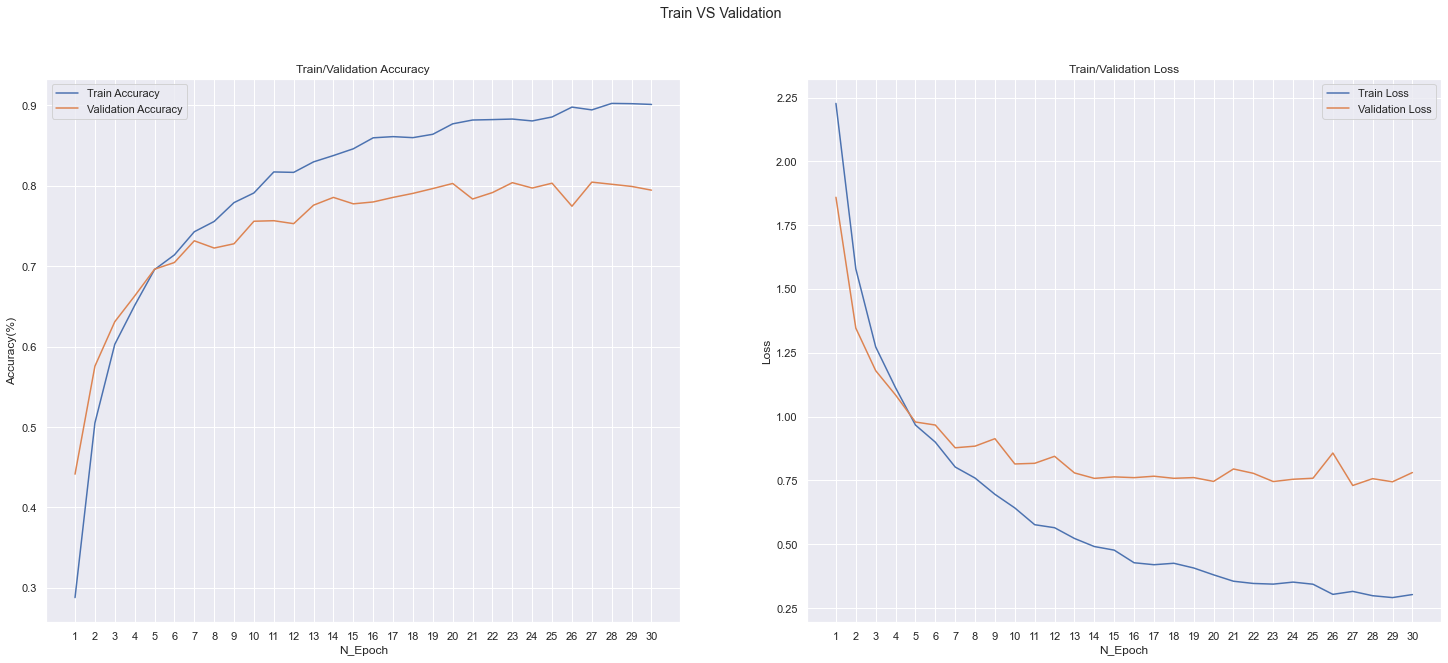

In [ ]:
epoch = [i+1 for i in range(30)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()